# Modello Rescorla-Wagner {#sec-solutions-rescorla-wagner}

# @sec-rescorla-wagner {.unnumbered} 

@exr-rescorla-wagner-1

Theta = 0.1: Probabilità = [0.4875026 0.5124974]
Theta = 1: Probabilità = [0.37754067 0.62245933]
Theta = 2: Probabilità = [0.26894142 0.73105858]
Theta = 5: Probabilità = [0.07585818 0.92414182]


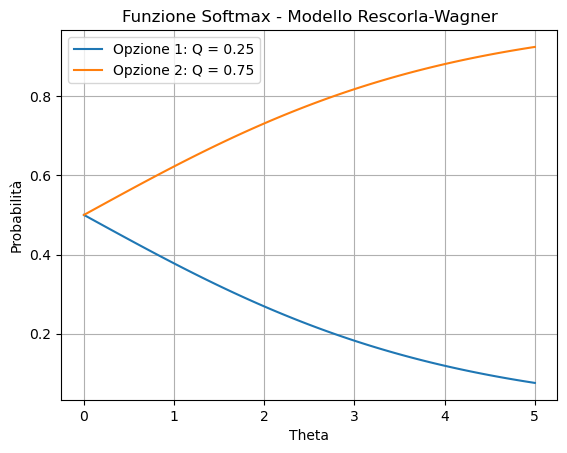

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(Q, theta):
    """
    Calcola le probabilità di selezione delle azioni utilizzando la regola softmax.

    Args:
        Q (numpy array): Array di valori attesi per ciascuna azione.
        theta (float): Parametro di temperatura.

    Returns:
        numpy array: Array di probabilità di selezione delle azioni.
    """
    # Calcola le probabilità softmax
    exp_values = np.exp(theta * Q)
    probabilities = exp_values / np.sum(exp_values)
    return probabilities


# Esempio di utilizzo della funzione softmax
Q = np.array([0.25, 0.75])
theta_values = [0.1, 1, 2, 5]

# Visualizziamo le probabilità per diversi valori di theta
for theta in theta_values:
    probabilities = softmax(Q, theta)
    print(f"Theta = {theta}: Probabilità = {probabilities}")

# Tracciare il grafico delle probabilità al variare di theta
theta_range = np.linspace(0, 5, 100)
probabilities_list = [softmax(Q, theta) for theta in theta_range]
probabilities_array = np.array(probabilities_list).T

plt.figure()
plt.plot(theta_range, probabilities_array[0], label="Opzione 1: Q = 0.25")
plt.plot(theta_range, probabilities_array[1], label="Opzione 2: Q = 0.75")
plt.xlabel("Theta")
plt.ylabel("Probabilità")
plt.title("Funzione Softmax - Modello Rescorla-Wagner")
plt.legend()
plt.grid(True)
plt.show()

@exr-rescorla-wagner-2

Ricompensa: 1, Errore di Previsione: 0.50, Nuovo Valore Atteso: 0.55
Ricompensa: 0, Errore di Previsione: -0.55, Nuovo Valore Atteso: 0.50
Ricompensa: 1, Errore di Previsione: 0.50, Nuovo Valore Atteso: 0.55
Ricompensa: 1, Errore di Previsione: 0.45, Nuovo Valore Atteso: 0.59
Ricompensa: 0, Errore di Previsione: -0.59, Nuovo Valore Atteso: 0.53


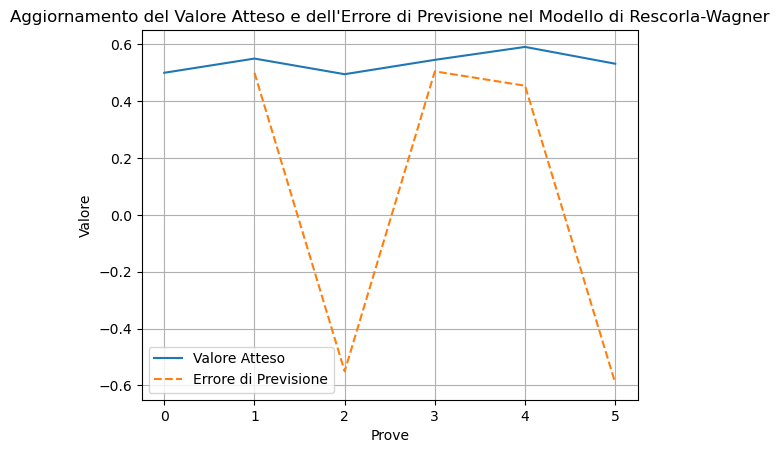

In [2]:
import numpy as np


def update_value(Q, R, alpha):
    """
    Aggiorna il valore atteso utilizzando il modello di Rescorla-Wagner.

    Args:
        Q (float): Valore atteso attuale.
        R (float): Ricompensa ricevuta.
        alpha (float): Tasso di apprendimento.

    Returns:
        float: Nuovo valore atteso.
        float: Errore di previsione.
    """
    # Calcola l'errore di previsione
    prediction_error = R - Q
    # Aggiorna il valore atteso
    Q_new = Q + alpha * prediction_error
    return Q_new, prediction_error


# Esempio di utilizzo della funzione update_value
Q = 0.5  # Valore atteso iniziale
R_values = [1, 0, 1, 1, 0]  # Sequenza di ricompense ricevute
alpha = 0.1  # Tasso di apprendimento

# Inizializza una lista per tracciare i valori attesi e gli errori di previsione
Q_values = [Q]
prediction_errors = []

# Aggiorna il valore atteso per ciascuna ricompensa ricevuta
for R in R_values:
    Q, error = update_value(Q, R, alpha)
    Q_values.append(Q)
    prediction_errors.append(error)
    print(
        f"Ricompensa: {R}, Errore di Previsione: {error:.2f}, Nuovo Valore Atteso: {Q:.2f}"
    )

# Visualizziamo i risultati
import matplotlib.pyplot as plt

plt.figure()
plt.plot(Q_values, label="Valore Atteso")
plt.plot(
    range(1, len(prediction_errors) + 1),
    prediction_errors,
    label="Errore di Previsione",
    linestyle="--",
)
plt.xlabel("Prove")
plt.ylabel("Valore")
plt.title(
    "Aggiornamento del Valore Atteso e dell'Errore di Previsione nel Modello di Rescorla-Wagner"
)
plt.legend()
plt.grid(True)
plt.show()

@exr-rescorla-wagner-3

1. **Scenario 1: Apprendimento Rapido in un Ambiente Stabile**

   - **Tasso di Apprendimento (`alpha`)**: In questo scenario, un tasso di apprendimento elevato (ad esempio, `alpha = 0.8`) sarebbe vantaggioso perché l'ambiente è stabile e la ricompensa è consistente. Un alto tasso di apprendimento permetterà al cane di aggiornare rapidamente le sue aspettative e imparare il trucco più velocemente.
   - **Valore Iniziale Atteso (`Q_0`)**: Il valore iniziale atteso potrebbe essere basso (ad esempio, `Q_0 = 0.1`), riflettendo la mancanza di conoscenza iniziale del cane sul trucco e la ricompensa associata.

2. **Scenario 2: Apprendimento Lento in un Ambiente Stabile**

   - **Tasso di Apprendimento (`alpha`)**: Qui, un tasso di apprendimento più basso (ad esempio, `alpha = 0.2`) sarebbe più appropriato. Anche se l'ambiente è stabile, un apprendimento più lento potrebbe essere sufficiente poiché il bambino potrebbe non essere costantemente focalizzato sui puzzle e può imparare gradualmente.
   - **Valore Iniziale Atteso (`Q_0`)**: Il valore iniziale atteso potrebbe essere moderato (ad esempio, `Q_0 = 0.3`), considerando che il bambino potrebbe avere un'idea preliminare che risolvere puzzle porta a una ricompensa, ma non è ancora certo dell'entità della ricompensa.

3. **Scenario 3: Apprendimento in un Ambiente Variabile**

   - **Tasso di Apprendimento (`alpha`)**: In un ambiente variabile, un tasso di apprendimento moderato (ad esempio, `alpha = 0.5`) potrebbe essere utile. Questo permetterebbe al giocatore di aggiornare rapidamente le aspettative senza essere troppo influenzato dalle variazioni casuali delle ricompense.
   - **Valore Iniziale Atteso (`Q_0`)**: Il valore iniziale atteso potrebbe essere neutro (ad esempio, `Q_0 = 0.5`), poiché il giocatore non ha informazioni iniziali solide su quale arma sia la migliore e dovrebbe esplorare per raccogliere dati.

4. **Scenario 4: Apprendimento con Informazioni Iniziali Parziali**

   - **Tasso di Apprendimento (`alpha`)**: Un tasso di apprendimento moderato (ad esempio, `alpha = 0.4`) potrebbe essere adeguato. Il ricercatore dovrebbe essere in grado di aggiornare le sue aspettative basandosi su nuovi dati, ma non dovrebbe ignorare completamente le informazioni preliminari.
   - **Valore Iniziale Atteso (`Q_0`)**: Il valore iniziale atteso dovrebbe essere relativamente alto (ad esempio, `Q_0 = 0.7`), riflettendo la conoscenza preliminare del ricercatore che un certo farmaco potrebbe essere efficace.

In conclusione

- **Tasso di Apprendimento (`alpha`)**: Un tasso di apprendimento elevato è utile in ambienti stabili dove le informazioni raccolte sono affidabili, mentre un tasso più basso è preferibile in contesti dove l'apprendimento deve essere graduale o l'ambiente è meno prevedibile.
- **Valore Iniziale Atteso (`Q_0`)**: Il valore iniziale atteso riflette la conoscenza preliminare dell'agente. Un valore basso indica poca conoscenza iniziale, mentre un valore alto indica una forte aspettativa basata su informazioni preliminari.

Questo esercizio ti aiuta a comprendere come i parametri del modello di Rescorla-Wagner influenzano il processo di apprendimento e come adattare questi parametri in base al contesto specifico.


@exr-rescorla-wagner-4

1. **Contesto 1: Addestramento di un Animale Domestico**

   - **Errore di Previsione**: Quando il cane esegue correttamente il comando e riceve una ricompensa, l'errore di previsione sarà positivo, indicando che il risultato è migliore di quanto atteso. Questo rinforza il comportamento corretto.
   - **Aggiornamento del Valore Atteso**: Il valore atteso per eseguire il comando "seduto" aumenterà, portando il cane a eseguire il comando più frequentemente in futuro.
   - **Limitazioni del Modello RW**: Il modello potrebbe non catturare la variabilità individuale del cane, come il suo livello di motivazione o distrazione, che possono influenzare l'apprendimento.

2. **Contesto 2: Apprendimento Scolastico**

   - **Errore di Previsione**: Se lo studente riceve un voto migliore del previsto, l'errore di previsione sarà positivo, motivando lo studente a continuare ad impegnarsi. Un voto peggiore del previsto porterà a un errore di previsione negativo.
   - **Aggiornamento del Valore Atteso**: Il valore atteso per lo studio e l'impegno nella materia aumenterà con feedback positivi e diminuirà con feedback negativi.
   - **Limitazioni del Modello RW**: Il modello potrebbe non considerare fattori esterni come il supporto familiare, lo stress o le risorse disponibili per lo studente, che influenzano l'apprendimento.

3. **Contesto 3: Terapia Comportamentale**

   - **Errore di Previsione**: Quando il paziente affronta la situazione temuta con successo e riceve un rinforzo positivo, l'errore di previsione sarà positivo, riducendo gradualmente l'ansia associata.
   - **Aggiornamento del Valore Atteso**: Il valore atteso per affrontare la situazione temuta senza evitare aumenterà, incoraggiando il paziente a continuare ad esporsi.
   - **Limitazioni del Modello RW**: Il modello potrebbe non catturare l'importanza del contesto terapeutico e del rapporto di fiducia tra paziente e terapeuta, che sono cruciali per il successo della terapia.

4. **Contesto 4: Apprendimento nelle Organizzazioni**

   - **Errore di Previsione**: I dipendenti che ricevono premi o riconoscimenti migliori del previsto avranno un errore di previsione positivo, aumentando la loro motivazione e impegno.
   - **Aggiornamento del Valore Atteso**: Il valore atteso per raggiungere gli obiettivi di performance aumenterà con i premi, incoraggiando i dipendenti a mantenere o migliorare le loro prestazioni.
   - **Limitazioni del Modello RW**: Il modello potrebbe non tenere conto di fattori come la cultura aziendale, la collaborazione tra colleghi e l'equilibrio tra vita lavorativa e personale, che possono influenzare le performance dei dipendenti.

In conclusione,

- **Errore di Previsione**: Gioca un ruolo cruciale nell'apprendimento, influenzando il grado di aggiornamento delle aspettative in base ai risultati osservati.
- **Aggiornamento del Valore Atteso**: Determina la probabilità che un comportamento venga ripetuto in futuro, basato sull'esperienza passata.
- **Limitazioni del Modello RW**: Sebbene il modello di Rescorla-Wagner fornisca un framework utile per comprendere l'apprendimento basato sul rinforzo, potrebbe non catturare tutte le sfaccettature dei contesti di apprendimento reali, inclusi fattori individuali, sociali e ambientali.

Questo esercizio ti aiuta a riflettere su come i concetti teorici del modello di Rescorla-Wagner si applicano a diversi contesti pratici di apprendimento e a riconoscere le potenziali limitazioni del modello.